In [2]:
# method 1 for determining the matrices U and V
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
from method1utils import train_model, get_err

In [4]:
# Import the data
Y_train = pickle.load((open("data/y_train.p", "rb")))
Y_test = pickle.load((open("data/y_test.p", "rb")))

num_users = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int)
num_movies = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int)

In [3]:
# Parameters fed to the model
regularizations = np.logspace(-4, 0, 5)
eta = 0.01
K = 20

# To hold error values
E_in = []
E_out = []
for reg in regularizations:
    print("Using regularization lambda = " + str(reg))
    U, V, e_in = train_model(num_users, num_movies, K, eta, reg, Y_train)
    E_in.append(e_in)
    e_out = get_err(U, V, Y_test)
    E_out.append(e_out)
    print("Final non regularized MSE for training set was " + str(e_in))
    print("Final non regularized MSE for test set was " + str(e_out))
    print("")
    

Using regularization lambda = 0.0001
Epoch 1, E_in (regularized MSE): 1.4816926186917259
Epoch 2, E_in (regularized MSE): 0.5971269610329883
Epoch 3, E_in (regularized MSE): 0.46844822766504285
Epoch 4, E_in (regularized MSE): 0.4163351025131091
Epoch 5, E_in (regularized MSE): 0.3856934752744544
Epoch 6, E_in (regularized MSE): 0.36235411357014613
Epoch 7, E_in (regularized MSE): 0.3444723039606461
Epoch 8, E_in (regularized MSE): 0.32797865311130103
Epoch 9, E_in (regularized MSE): 0.3147301871031047
Epoch 10, E_in (regularized MSE): 0.3023694770669434
Epoch 11, E_in (regularized MSE): 0.2916412197559994
Epoch 12, E_in (regularized MSE): 0.2828183743181398
Epoch 13, E_in (regularized MSE): 0.27430814031562184
Epoch 14, E_in (regularized MSE): 0.2666695128655082
Epoch 15, E_in (regularized MSE): 0.2592500181059538
Epoch 16, E_in (regularized MSE): 0.2527389237332121
Epoch 17, E_in (regularized MSE): 0.24676475893078448
Epoch 18, E_in (regularized MSE): 0.24126406073437298
Epoch 19, E_

Epoch 48, E_in (regularized MSE): 0.18101825726348617
Final non regularized MSE for training set was 0.18018541486176082
Final non regularized MSE for test set was 0.5489876749131283

Using regularization lambda = 0.1
Epoch 1, E_in (regularized MSE): 1.510035019428563
Epoch 2, E_in (regularized MSE): 0.6068093874838061
Epoch 3, E_in (regularized MSE): 0.48376613419581554
Epoch 4, E_in (regularized MSE): 0.44275152525961725
Epoch 5, E_in (regularized MSE): 0.4224790656249586
Epoch 6, E_in (regularized MSE): 0.4071969031402593
Epoch 7, E_in (regularized MSE): 0.397400584968599
Epoch 8, E_in (regularized MSE): 0.38830779741981436
Epoch 9, E_in (regularized MSE): 0.3814763042101626
Epoch 10, E_in (regularized MSE): 0.3752676415826304
Epoch 11, E_in (regularized MSE): 0.3701323060181097
Epoch 12, E_in (regularized MSE): 0.36475918002123
Epoch 13, E_in (regularized MSE): 0.3597431352636327
Epoch 14, E_in (regularized MSE): 0.3571143149375775
Epoch 15, E_in (regularized MSE): 0.35195261202701

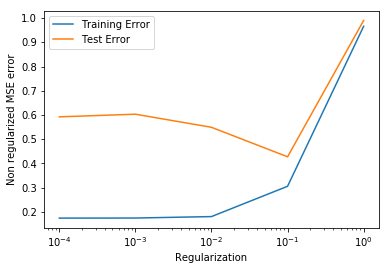

In [4]:
plt.plot(regularizations, E_in, label = "Training Error")
plt.plot(regularizations, E_out, label = "Test Error")
plt.xscale("log")
plt.xlabel("Regularization")
plt.ylabel("Non regularized MSE error")
plt.legend()
plt.show()

Reg = 0.1 clearly gives the best result. Out of sample MSE using this method and reg = 0.1 was 0.427.

In [6]:
U, V, e_in = train_model(num_users, num_movies, 20, 0.01, 0.1, Y_train)

# Note that the U and V we get isn't in the same form as the Y = U^T V matrices are.
# So we just transpose them.
print("U is: ")
print(U.T)
print("V is: ")
print(V.T)

Epoch 1, E_in (regularized MSE): 1.7455649111433102
Epoch 2, E_in (regularized MSE): 0.6211834409956629
Epoch 3, E_in (regularized MSE): 0.48571651509748603
Epoch 4, E_in (regularized MSE): 0.44007769739668584
Epoch 5, E_in (regularized MSE): 0.41655017870370536
Epoch 6, E_in (regularized MSE): 0.4021487176595115
Epoch 7, E_in (regularized MSE): 0.3912606363295591
Epoch 8, E_in (regularized MSE): 0.38266837694081657
Epoch 9, E_in (regularized MSE): 0.3753741209037158
Epoch 10, E_in (regularized MSE): 0.37135264749435076
Epoch 11, E_in (regularized MSE): 0.36433415800156693
Epoch 12, E_in (regularized MSE): 0.3609008049083482
Epoch 13, E_in (regularized MSE): 0.3565240261623593
Epoch 14, E_in (regularized MSE): 0.3537756472057975
Epoch 15, E_in (regularized MSE): 0.3491943959532444
Epoch 16, E_in (regularized MSE): 0.3460675349999516
Epoch 17, E_in (regularized MSE): 0.3428554688527883
Epoch 18, E_in (regularized MSE): 0.34138247936332977
Epoch 19, E_in (regularized MSE): 0.336048345162